# <center> Sentiment Prediction </center>

In [6]:
# Import Necessary Packages

import pandas as pd
import pickle
import datetime

import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt

from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import HashingVectorizer
from sklearn.linear_model import LogisticRegression

from sklearn import metrics

from statsmodels.tsa.arima_model import ARIMA

import nltk
import re
from nltk.stem import WordNetLemmatizer 
from nltk.corpus import stopwords 

stop_words = set(stopwords.words('english')) # Set of stopwords (Words that doesn't give meaningful information)

lemmatizer = WordNetLemmatizer()  # Used for converting words with similar meaning to a single word.

In [4]:
# Input the dataset

df = pd.read_csv("Sentiment Polarity Data.csv",sep='\t') 

df.drop(['id', 'subjectivity'], axis=1, inplace=True) # Remove id and subjectivity 
df.dropna(inplace=True)

df['sentiment'] = df['sentiment'].apply(lambda x:1 if x == "Positive" else (-1 if x == "Negative" else 0)) # Replace sentiment string with its appropriate value

df 

,processed_text,sentiment
0,yeah missing freedom life covid19,-1
1,contribute cm relief fund help delhi govt figh...,0
2,bhai assalamualaikum possible please call bhai...,-1
3,bold adress nation activity banned except esse...,1
4,please understand important stay home responsi...,1
...,...,...
582685,URL,0
582686,covid,0
582687,italy face two new coronavirus outbreak,1
582688,india become top none modi reign india became ...,1


We have removed id and subjectivity as they are not much of use here.

We only require the processed tweet_text along with its corresponding sentiment 

## Training and Prediction

In [5]:
train = df.iloc[:500000]
test = df.iloc[500000:]

#Split the data to train and test set

X_train = train.processed_text
X_test = test.processed_text
y_train = train.sentiment
y_test = test.sentiment

In [7]:
text_clf = Pipeline([('vect', HashingVectorizer()),
                     ('clf', LogisticRegression()),
                     ])

#Create the ML Pipeline and fit the data

text_clf.fit(X_train, y_train)

predicted = text_clf.predict(X_test)  #Make the predictions of test data

print(metrics.classification_report(y_test, predicted))  # Find the different metric values 

              precision    recall  f1-score   support

          -1       0.92      0.81      0.86     17482
           0       0.89      0.98      0.94     29221
           1       0.95      0.93      0.94     35909

    accuracy                           0.92     82612
   macro avg       0.92      0.91      0.91     82612
weighted avg       0.92      0.92      0.92     82612



Since the metric scores are around 0.92, we can say that the generated model is a good one in predicting the sentiments of people.

In [8]:
# Save the model

pickle.dump(text_clf, open("Sentiment Predictor", 'wb'))

### Checking the model with a sample text

In [9]:
def text_process(tweet):   # Function to process the input data
    
    processed_tweet = [] # To store processed text
    
    tweet = tweet.lower() # Convert to lower case

    tweet = re.sub(r'((www\.[\S]+)|(https?://[\S]+))', 'URL', tweet) # Replaces any URLs with the word URL
    
    tweet = re.sub(r'@[\S]+', 'USER_MENTION', tweet) # Replace @handle with the word USER_MENTION
    
    tweet = re.sub(r'#(\S+)', r' \1 ', tweet) # Removes # from hashtag
    
    tweet = re.sub(r'\brt\b', '', tweet) # Remove RT (retweet)
    
    tweet = re.sub(r'\.{2,}', ' ', tweet) # Replace 2+ dots with space
    
    tweet = tweet.strip(' "\'') # Strip space, " and ' from tweet
    
    tweet = re.sub(r'\s+', ' ', tweet) # Replace multiple spaces with a single space
    
    words = tweet.split()
    
    for word in words:
            
        word = word.strip('\'"?!,.():;') # Remove Punctuations
        
        word = re.sub(r'(.)\1+', r'\1\1', word) # Convert more than 2 letter repetitions to 2 letter (happppy -> happy)
        
        word = re.sub(r'(-|\')', '', word) # Remove - & '
        
        if (re.search(r'^[a-zA-Z][a-z0-9A-Z\._]*$', word) is not None): # Check if the word starts with an english letter
            
            if(word not in stop_words):                                 # Check if the word is a stopword.
                
                word = str(lemmatizer.lemmatize(word))                  # Lemmatize the word
                
                processed_tweet.append(word)
                
    return ' '.join(processed_tweet)

In [10]:
sample_text = input()

# Preprocess the text for better prediction

predict = text_clf.predict([text_process(sample_text)])

result = "Positive" if predict>0 else ("Neutral" if predict == 0 else "Negative")

print(result)

Good morning to all
Positive


In [6]:
tc = pickle.load(open("Sentiment Predictor", 'rb'))  # Code to load ML model for later use

## Time series Prediction

In [4]:
# Read the data

df = pd.read_csv("Processed Data.csv",sep ='\t')
sent_df = pd.read_csv("Sentiment Polarity Data.csv",sep='\t') 

In [5]:
df.sample(3)  # Sample Data

,date,time,username,to,replies,retweets,favorites,text,mentions,hashtags,id,permalink,processed_text
60588,2020-03-30,06:53:10,mohsin_shakil,takhtsulaiman,0,0,0,Pl serious consider possibility of #Kashmir #D...,@UN @WHO @UNSC_Reports @ImranKhanPTI @narendra...,#Kashmir #Demilitarisation #COVID19,1244518012658606081,https://twitter.com/mohsin_shakil/status/12445...,pl serious consider possibility kashmir demili...
109766,2020-04-04,08:02:49,fred_youknowme,ANCALERTS,0,0,0,Make it urgent to release your donation Mr. Sp...,NaN,#alanpetercayetano #COVID19 #COVID19Pandemic #...,1246347478296821763,https://twitter.com/fred_youknowme/status/1246...,make urgent release donation mr speaker purcha...
84086,2020-04-01,11:56:45,neeravpradhan,NaN,0,0,1,"Distrusting Food to Homeless, Ration Material ...",NaN,#covid19,1245319186781536256,https://twitter.com/neeravpradhan/status/12453...,distrusting food homeless ration material need...


In [6]:
sent_df.sample(3) # Sample Data

,id,processed_text,sentiment,subjectivity
217991,1250691045228195841,lockdown2 lockdown coronaindia hello friend lo...,Neutral,0.000000
414215,1261667890631188482,finished day resetting may target nikerunclub ...,Neutral,0.000000
64967,1244630836567101442,new video alert URL cope lockdown youtube yout...,Positive,0.454545


In [7]:
# Select only required data

df = df.iloc[:,0:1]
df = sent_df.join(df)
df = df.drop(['subjectivity','processed_text','id'],axis=1)
df

,sentiment,date
0,Negative,2020-03-25
1,Neutral,2020-03-25
2,Negative,2020-03-25
3,Positive,2020-03-25
4,Positive,2020-03-25
...,...,...
582685,Neutral,2020-06-14
582686,Neutral,2020-06-14
582687,Positive,2020-06-14
582688,Positive,2020-06-14


In [8]:
result = df.groupby(['date', 'sentiment']).size().unstack(fill_value=0)  # Group the data and split it into different columns
result = result.transform(lambda x: round(x/sum(x),4)*100,axis=1)  #Find the percentage values for better plotting
result

sentiment,Negative,Neutral,Positive
date,,,
2020-03-25,18.18,35.74,46.08
2020-03-26,19.03,36.42,44.55
2020-03-27,19.03,35.44,45.52
2020-03-28,21.31,34.75,43.94
2020-03-29,20.83,34.94,44.23
...,...,...,...
2020-06-10,23.60,31.51,44.89
2020-06-11,21.86,35.68,42.46
2020-06-12,20.27,37.98,41.75


The change in the percentage of sentiments with respect to each day is really helpful in predicting the future sentiments. We can take the sentiments from March 25 to May 31 (Lockdown 1 to 4) and predict the sentiments of people from June 1 to 14 (If the lockdown was extended).<br /> <br />
The predicted values can be compared with the actual sentiments of people. The actual sentiments of the people was when the lockdown was not extended (Unlock 1.0).

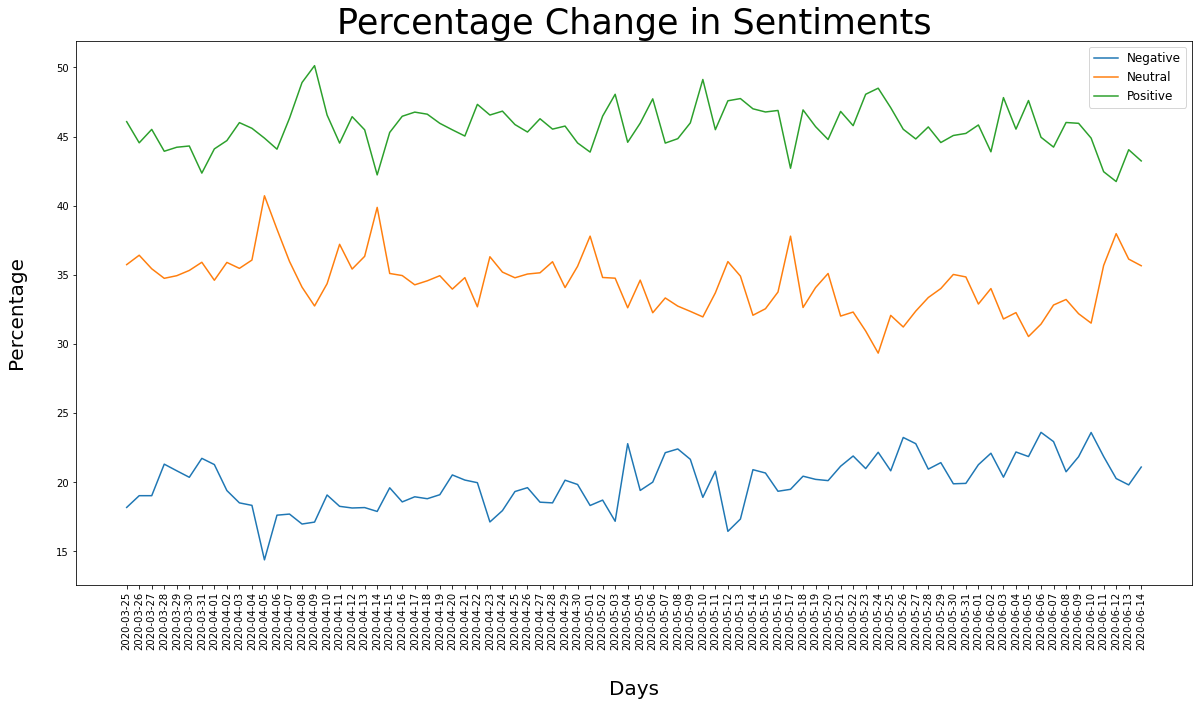

In [9]:
# Plot the data

plt.figure(figsize=(20,10))
plt.xticks(rotation=90)
plt.plot(result)
plt.title("Percentage Change in Sentiments",fontsize=35)
plt.xlabel("Days",fontsize=20,labelpad=30)
plt.ylabel("Percentage",fontsize=20,labelpad=30)
plt.legend(labels=result.columns,fontsize=12)

Here we can see that people has a positive outlook towards lockdown. <br/>

We can see that Positive tweets are averaged at 45%, Neutral tweets at 35% and Negative tweets are at 20%.

In [12]:
train = result.iloc[:68]
test = result.iloc[68:]
model = ARIMA(train.Positive, order=(2,2,1)) #Train the Arima Model (p,d,q)
model_fit = model.fit(disp=-1)
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:            D2.Positive   No. Observations:                   66
Model:                 ARIMA(2, 2, 1)   Log Likelihood                -126.515
Method:                       css-mle   S.D. of innovations              1.577
Date:                Mon, 06 Jul 2020   AIC                            263.030
Time:                        13:13:06   BIC                            273.979
Sample:                    03-27-2020   HQIC                           267.357
                         - 05-31-2020                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.0014      0.006     -0.234      0.815      -0.013       0.010
ar.L1.D2.Positive    -0.3845      0.116     -3.322      0.001      -0.611      -0.158
ar.L2.D2.Positive    -0.

c:\users\laptop asus\appdata\local\programs\python\python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
c:\users\laptop asus\appdata\local\programs\python\python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'



    p: The number of lag observations included in the model, also called the lag order.
    d: The number of times that the raw observations are differenced, also called the degree of differencing.
    q: The size of the moving average window, also called the order of moving average.
    
    The corresponding values are sually found by trial and error. 
    (Minimise AIC and ensure P>|z| is less than 0.5 at the end.)


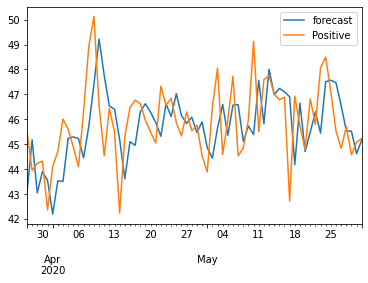

In [13]:
model_fit.plot_predict(dynamic=False)  #Prediction vs real data
plt.show()

In [14]:
forecast = model_fit.forecast(steps=14)  #Forecast next 14 days (Data will be smooth line)

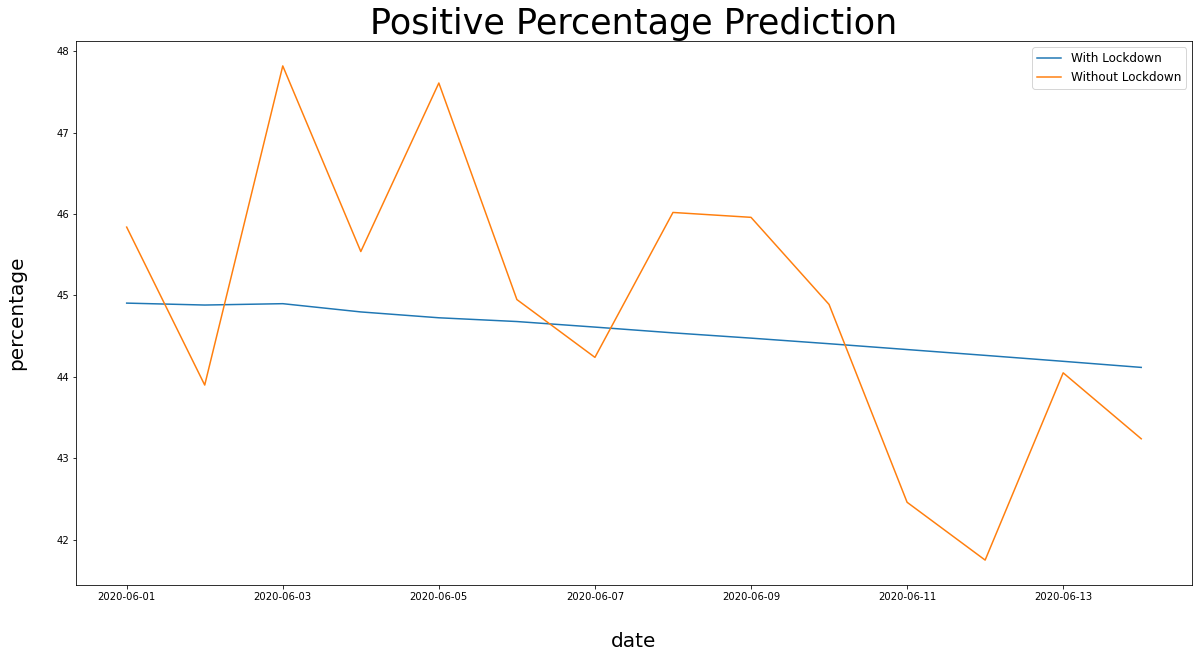

In [15]:
plt.figure(figsize=(20,10))

plt.title("Positive Percentage Prediction",fontsize=35)
plt.xlabel("date",fontsize=20,labelpad=30)
plt.ylabel("percentage",fontsize=20,labelpad=30)


pd.Series(forecast[0]).plot()
test.Positive.plot()

plt.legend(labels=['With Lockdown','Without Lockdown'],fontsize=12)

The model has captured the trend of slight increase in Positive tweets in the initial days followed by a decrease in the amount of positive tweets.

Since the model was trained with the data during the lockdown days, it predicts the trend of tweets if the lockdown was to continue.

The blue line shows the trend of tweets if the lockdown was to continue.
The red line shows the trend of tweets after unlock.

In [17]:
start = datetime.datetime(2020, 6, 1)
end = datetime.datetime(2020, 6, 14)

delta = end - start
test_dates = []
for i in range(delta.days + 1):
    test_dates.append(str(start + datetime.timedelta(days=i)).split()[0])

test_dates 

['2020-06-01',
 '2020-06-02',
 '2020-06-03',
 '2020-06-04',
 '2020-06-05',
 '2020-06-06',
 '2020-06-07',
 '2020-06-08',
 '2020-06-09',
 '2020-06-10',
 '2020-06-11',
 '2020-06-12',
 '2020-06-13',
 '2020-06-14']

In [18]:
predicted_data = pd.DataFrame(forecast[0],index=test_dates,columns=['Positive'])
predicted_data  # Find the predicted data

,Positive
2020-06-01,44.906453
2020-06-02,44.882768
2020-06-03,44.899469
2020-06-04,44.798143
2020-06-05,44.726320
2020-06-06,44.680156
2020-06-07,44.611880
2020-06-08,44.541144
2020-06-09,44.476338
2020-06-10,44.407676


Repeat the same process for neutral and negative tweets

In [21]:
#Neutral
model = ARIMA(train.Neutral, order=(2,2,1))
model_fit = model.fit(disp=-1)
forecast = model_fit.forecast(steps=14)
predicted_data['Neutral'] = forecast[0]

#Negative
model = ARIMA(train.Negative, order=(2,2,1))
model_fit = model.fit(disp=-1)
forecast = model_fit.forecast(steps=14)
predicted_data['Negative'] = forecast[0]

c:\users\laptop asus\appdata\local\programs\python\python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
c:\users\laptop asus\appdata\local\programs\python\python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
c:\users\laptop asus\appdata\local\programs\python\python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
c:\users\laptop asus\appdata\local\programs\python\python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequen

In [22]:
# Predicted Data
predicted_data

,Positive,Neutral,Negative
2020-06-01,44.906453,34.790171,20.257406
2020-06-02,44.882768,34.936002,20.106584
2020-06-03,44.899469,34.985239,20.096066
2020-06-04,44.798143,35.031006,20.134194
2020-06-05,44.726320,35.101241,20.118101
2020-06-06,44.680156,35.166601,20.113107
2020-06-07,44.611880,35.232096,20.114264
2020-06-08,44.541144,35.301914,20.108900
2020-06-09,44.476338,35.373494,20.103622
2020-06-10,44.407676,35.446914,20.098445


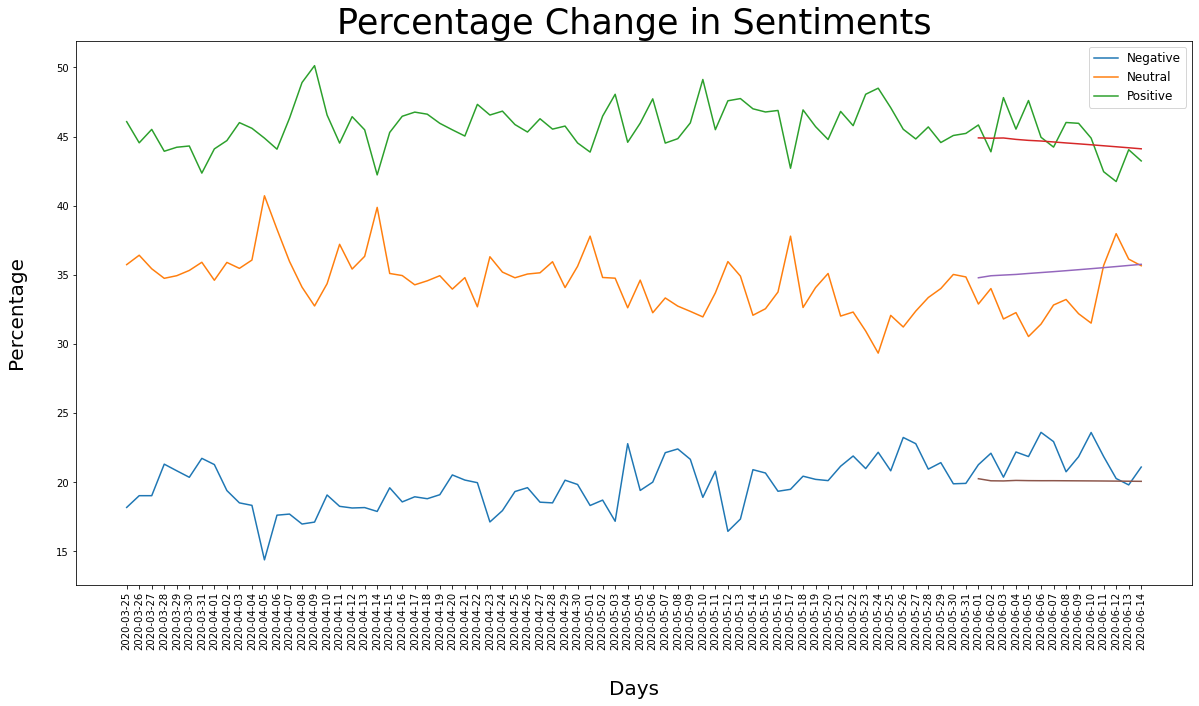

In [23]:
#Plot the data

plt.figure(figsize=(20,10))
plt.plot(result)
plt.plot(predicted_data)
plt.xticks(rotation=90)
plt.title("Percentage Change in Sentiments",fontsize=35)
plt.xlabel("Days",fontsize=20,labelpad=30)
plt.ylabel("Percentage",fontsize=20,labelpad=30)
plt.legend(labels=result.columns,fontsize=12)

The above visualisation shows the sentiments of people. The second line with respect to each line graph shows the predicted sentiments of people if lockdown was extended.

We can see that if the lockdown was extended:
<ul><li>The amount of positive tweets started to decrease after staying constant in the initial days.</li>
    <li>The amount of neutral tweets started to increase.</li>
    <li>The amount of negative tweets stayed constant.</li></ul>

So people have a neutral outlook towards the extension of lockdown(With a decrease in positivity).

In [236]:
# Save the data

predicted_data.to_csv("Time Series Prediction.csv")